Author: Tashay Green in collaboration with Jordan Vani and Francis Ko

In [5]:
import pylab as pl
from scipy.optimize import curve_fit, minimize
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Chi Squared Distribution

In [23]:
# Saving chi squared distribution in a variable
distribution = ['chisq']

In [24]:
# Assigning a mean value to be used in the distribution
mymean = 100

In [25]:
# Establishing the number of degrees of freedom for the chi square distribution, which is the same as the mean. 
df = mymean

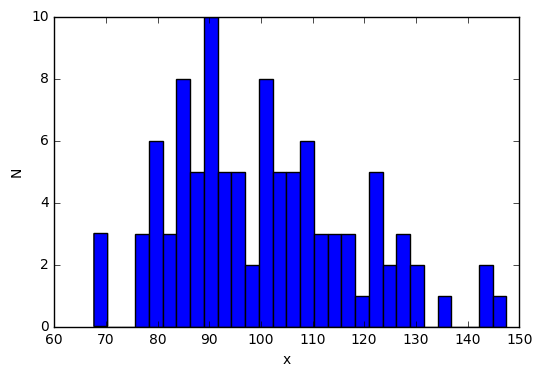

In [26]:
# Creating an empty dictionary to store the distributions.
md = {}
# md is an empty dictionary
md['chisq'] = np.random.chisquare(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 1: Chi sq distribution: df = 100, N=100

In [27]:
# Mean and standard deviation for the distribution 
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 100.67, standard deviation: 17.23


# Chi Squared Distribution for 100 Chi Square Distributions

In [28]:
# 100 Distributions of different sizes. All integers between 10 and 2000. 
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


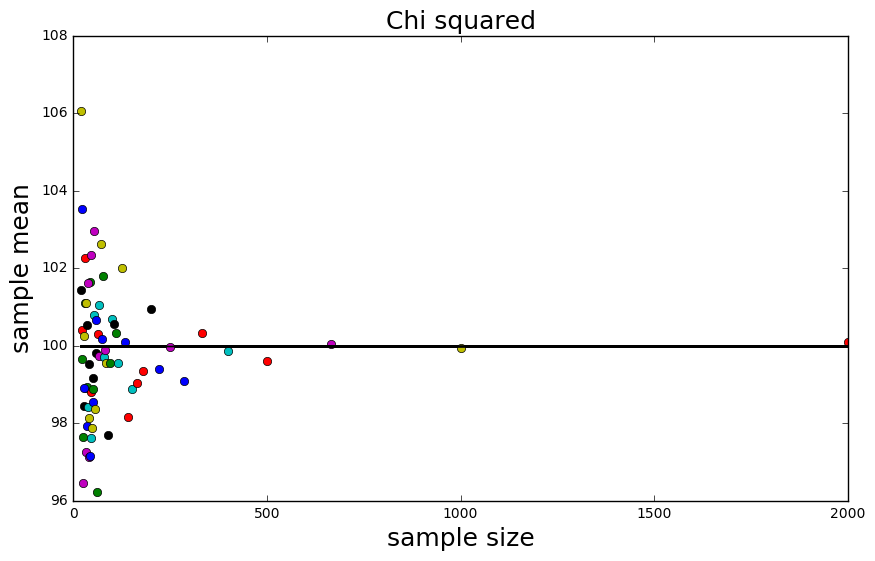

In [29]:
# I am gonna overwrite the dictionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 2: The larger sample size of 100 chi square distributions closely resembles the mean of the parent distribution.

### Histogram of the mean of all samples:

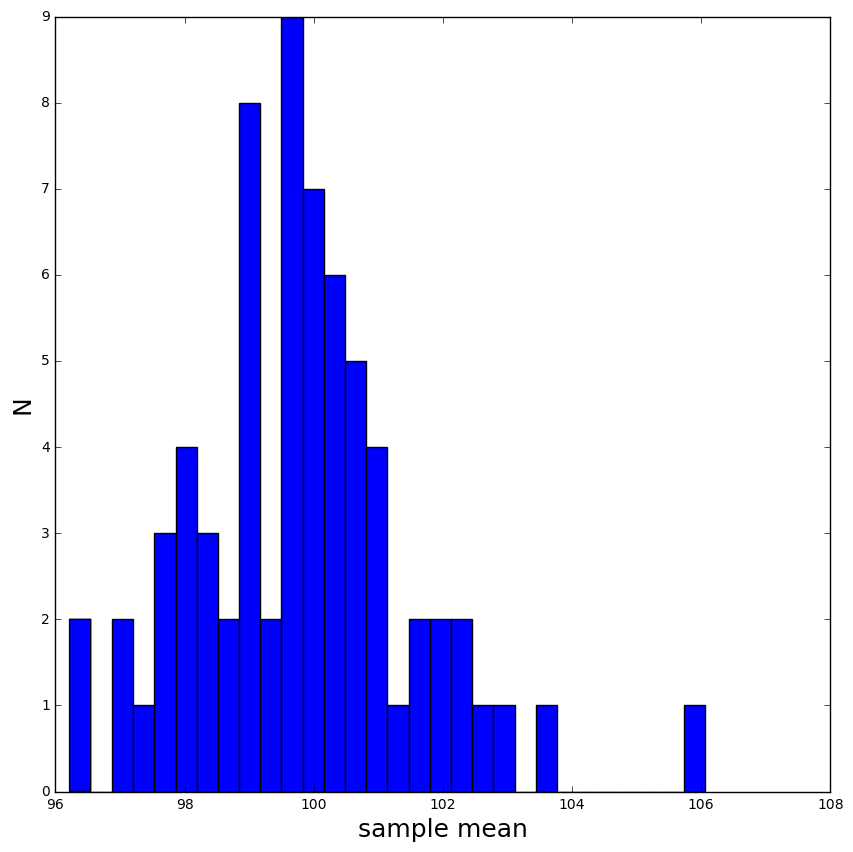

In [30]:
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 3: Representation of the Central Limit Theorem. 

#  Normal Distribution

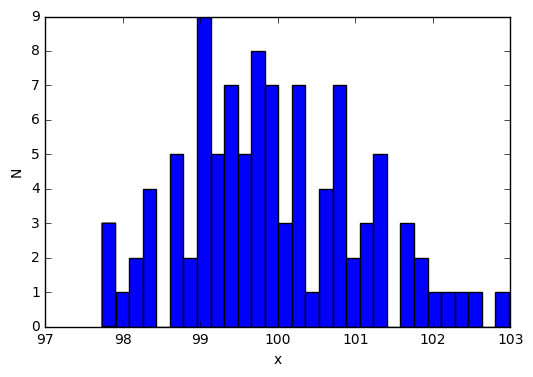

In [32]:
distribution = ['gaus']
mymean = 100

# Creating an empty disctionary to store the distributions
md = {}
# md is an empty dictionary
md['gaus'] = np.random.normal(mymean, size=100)
# md now is a dictionary with one object: an array by the key 'gaus'
pl.hist(md['gaus'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 4: Normal distribution: mean = 100, N=100

In [33]:
print ("Normal mean: %.2f, standard deviation: %.2f"%(md['gaus'].mean(), md['gaus'].std()))

Normal mean: 99.94, standard deviation: 1.14


# Normal Distribution for 100 Normal Distributions

In [14]:
# 100 Distributions of different sizes. All integers between 10 and 2000. 
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


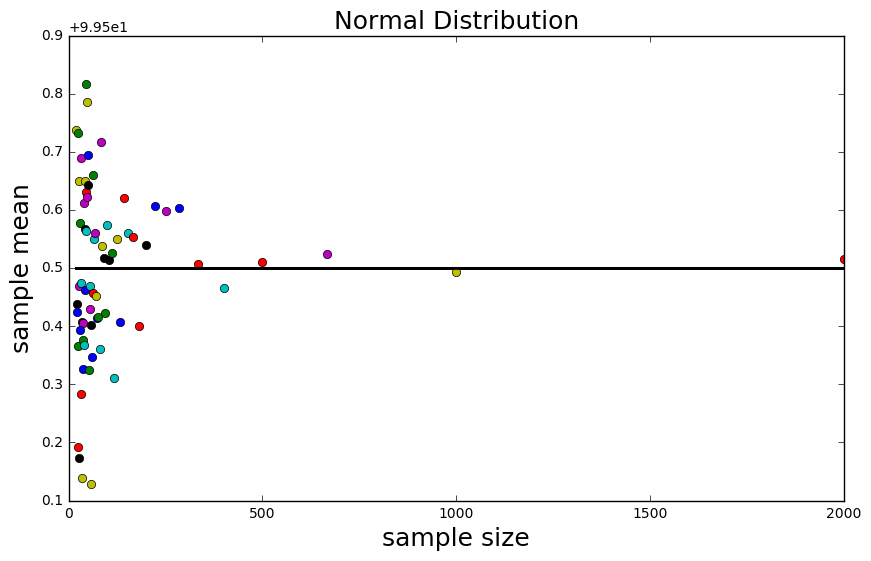

In [16]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['gaus'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['gaus'][n] = np.random.normal(mymean, size = n)
    
# save the means for plotting later    

md['gaus']['means'] = {}
axgaus_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['gaus']:
    if not type(nn) == str:
        md['gaus']['means'][nn] = md['gaus'][nn].mean()
        #and plot it
        axgaus_mu_n.plot(nn, md['gaus']['means'][nn], 'o')
        axgaus_mu_n.set_xlabel('sample size', fontsize=18)
        axgaus_mu_n.set_ylabel('sample mean', fontsize=18)
        axgaus_mu_n.set_title('Normal Distribution', fontsize=18)
        axgaus_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

### Figure 5: The mean value of the sample approaches the true mean with an increased sample size of 100 distributions. 

### Histogram of the mean of all samples:

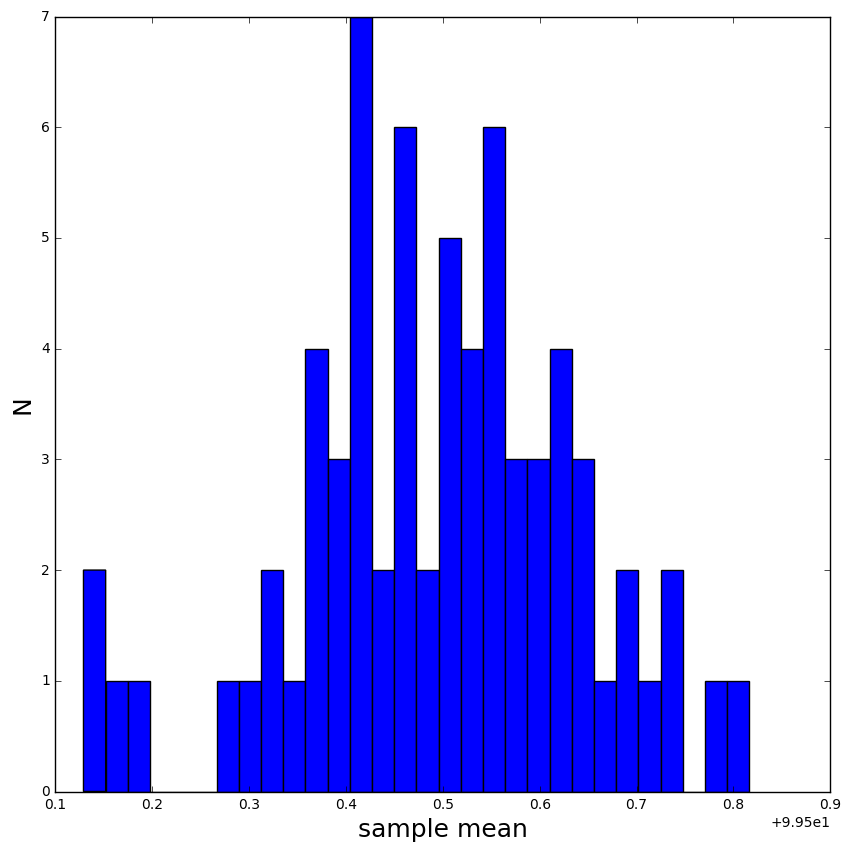

In [17]:
allmeans = list(md['gaus']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 6: Representation of the Central Limit Theorem. 

# Poisson Distribution

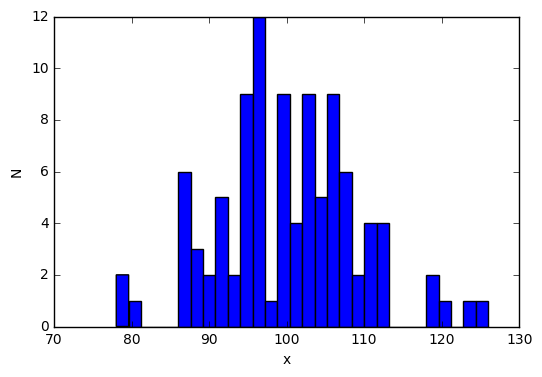

In [34]:
distribution = ['pois']
mymean = 100

# Creating an empty disctionary to store the distributions
md = {}
# md is an empty dictionary
md['pois'] = np.random.poisson(mymean, size=100)
# md now is a dictionary with one object: an array by the key 'gaus'
pl.hist(md['pois'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 7: Poisson distribution: mean = 100, N=100

In [35]:
print ("Poisson mean: %.2f, standard deviation: %.2f"%(md['pois'].mean(), md['pois'].std()))

Poisson mean: 100.11, standard deviation: 9.04


In [ ]:
# 100 Distributions of different sizes. All integers between 10 and 2000. 
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

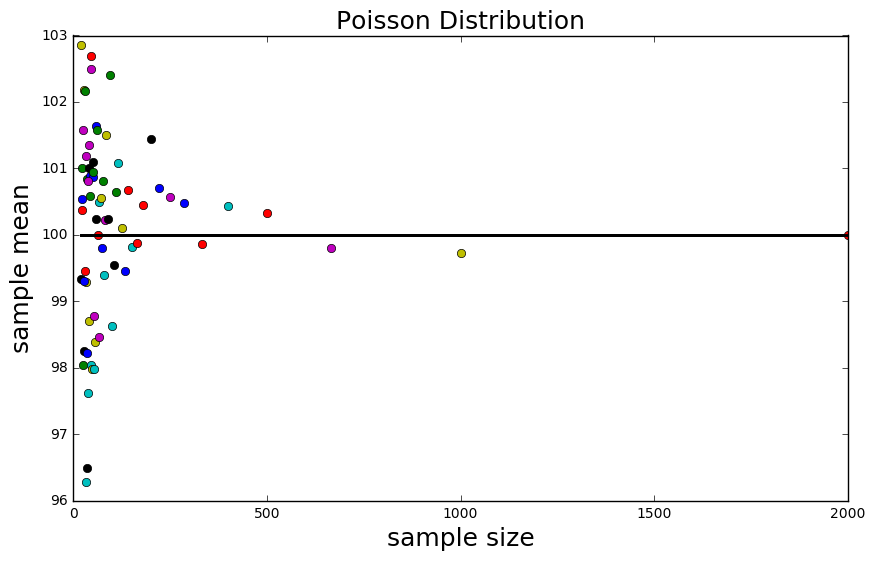

In [19]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['pois'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['pois'][n] = np.random.poisson(mymean, size = n)
    
# save the means for plotting later    

md['pois']['means'] = {}
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        #and plot it
        axpois_mu_n.plot(nn, md['pois']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
        axpois_mu_n.set_title('Poisson Distribution', fontsize=18)
        axpois_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

### Figure 8: The mean value of the sample approaches the true mean with an increased sample size of 100 distributions. 

### Histogram of the mean of all samples:

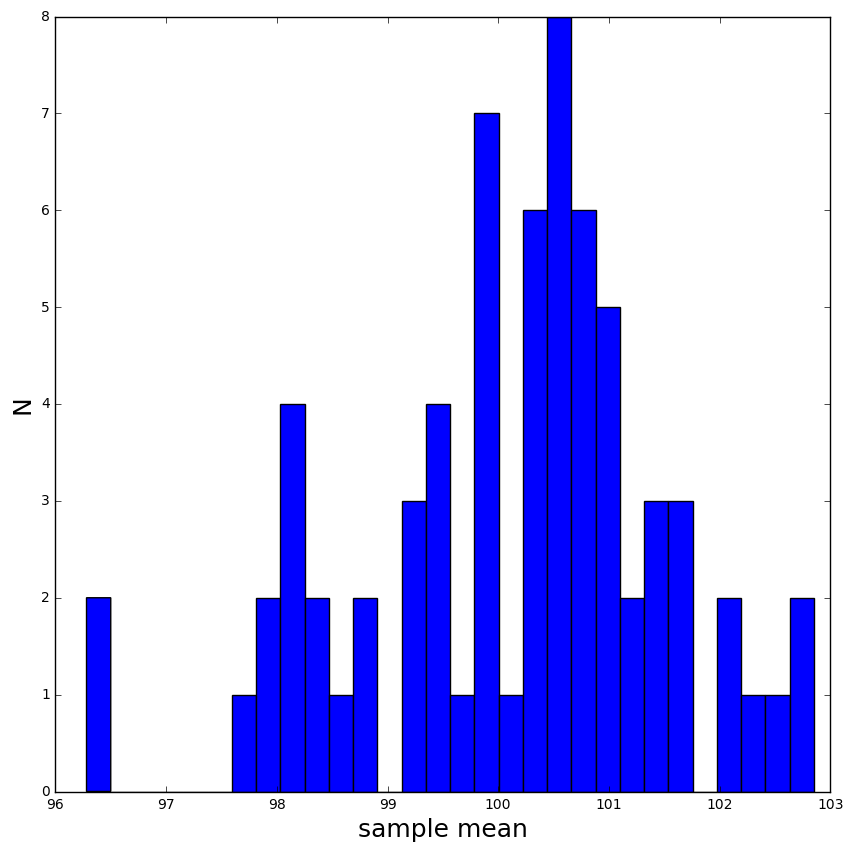

In [20]:
allmeans = list(md['pois']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 9: Representation of the Central Limit Theorem. 

# Binomial Distribution

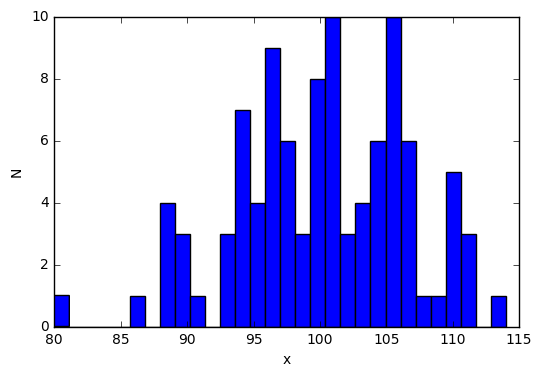

In [37]:
distribution = ['binomial']
n = 200
p = 0.5

# Creating an empty disctionary to store the distributions
md = {}
# md is an empty dictionary
md['binomial'] = np.random.binomial(n,p,size=100)
# md now is a dictionary with one object: an array by the key 'binomial'
pl.hist(md['binomial'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 10: Binomial distribution: mean = 200, N=100

In [38]:
print ("Binomial mean: %.2f, standard deviation: %.2f"%(md['binomial'].mean(), md['binomial'].std()))

Binomial mean: 100.09, standard deviation: 6.45


In [39]:
# 100 Distributions of different sizes. All integers between 10 and 2000. 
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


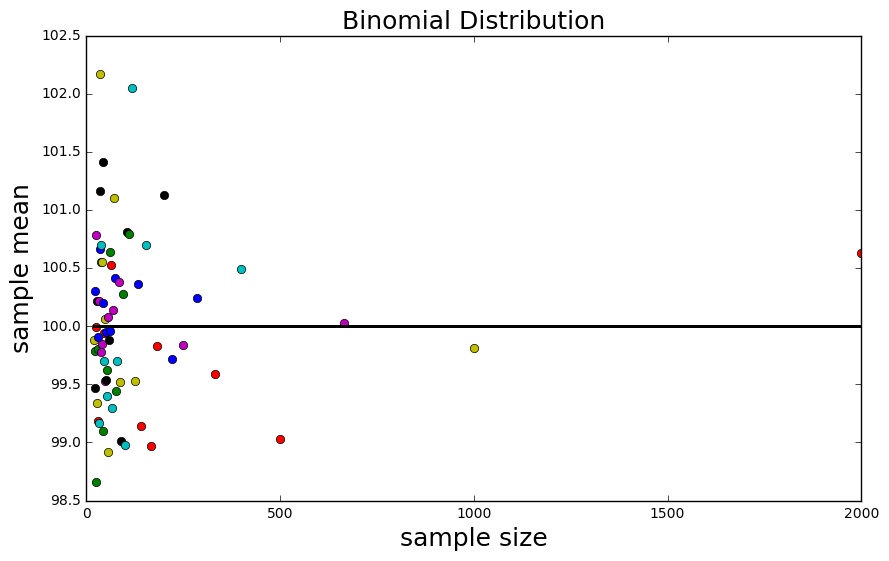

In [44]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['binomial'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['binomial'][n] = np.random.binomial(200,p,size = 100)
    
# save the means for plotting later    

md['binomial']['means'] = {}
axbinomial_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        #and plot it
        axbinomial_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        axbinomial_mu_n.set_xlabel('sample size', fontsize=18)
        axbinomial_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinomial_mu_n.set_title('Binomial Distribution', fontsize=18)
        axbinomial_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

### Figure 11: The mean value of the sample approaches the true mean with an increased sample size of 100 distributions. 

### Histogram of the mean of all samples:

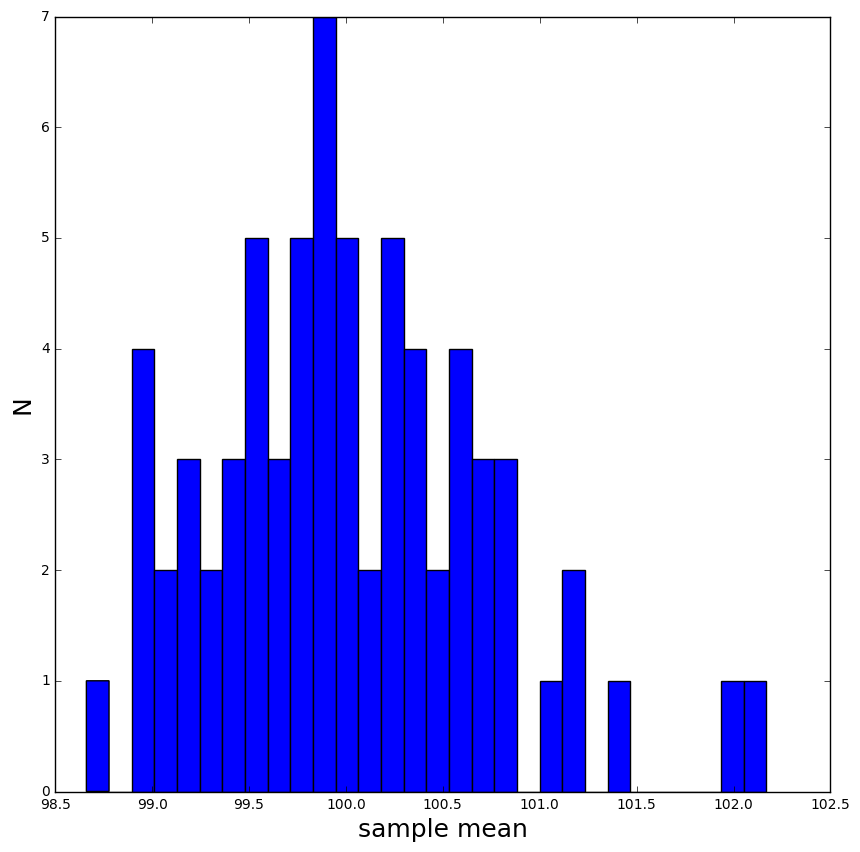

In [45]:
allmeans = list(md['binomial']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 12: Representation of the Central Limit Theorem. 

# Log Normal Distribution

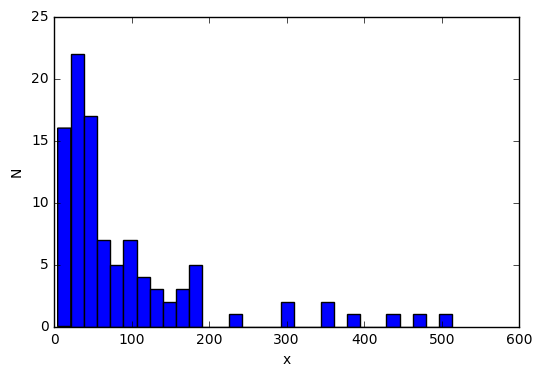

In [66]:
distribution = ['lnorm']
mymean = 100

# Creating an empty disctionary to store the distributions
md = {}
# md is an empty dictionary
md['lnorm'] = np.random.lognormal(np.log(63), size=100)
# md now is a dictionary with one object: an array by the key 'lnorm'
pl.hist(md['lnorm'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 13: Log Normal distribution: mean = 100, N = 100. 

In [67]:
print ("Log Normal mean: %.2f, standard deviation: %.2f"%(md['lnorm'].mean(), md['lnorm'].std()))

Log Normal mean: 91.10, standard deviation: 102.54


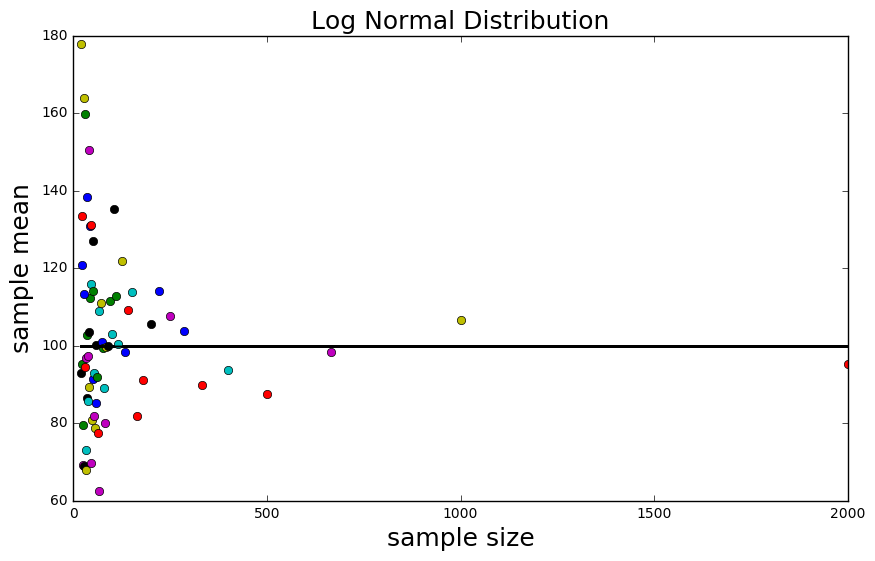

In [61]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['lnorm'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['lnorm'][n] = np.random.lognormal(np.log(63), size = n)
    
# save the means for plotting later    

md['lnorm']['means'] = {}
axlognorm_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['lnorm']:
    if not type(nn) == str:
        md['lnorm']['means'][nn] = md['lnorm'][nn].mean()
        #and plot it
        axlognorm_mu_n.plot(nn, md['lnorm']['means'][nn], 'o')
        axlognorm_mu_n.set_xlabel('sample size', fontsize=18)
        axlognorm_mu_n.set_ylabel('sample mean', fontsize=18)
        axlognorm_mu_n.set_title('Log Normal Distribution', fontsize=18)
        axlognorm_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

### Figure 14: The mean value of the sample approaches the true mean with an increased sample size of 100 distributions. 

### Histogram of the mean of all samples:

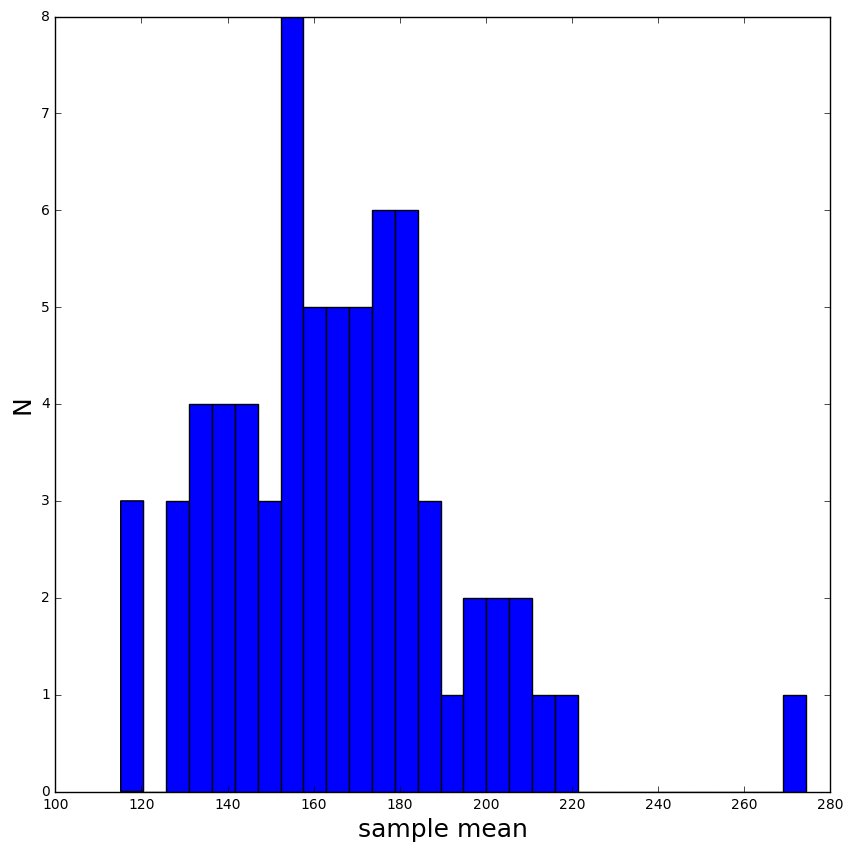

In [60]:
allmeans = list(md['lnorm']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 15: Representation of the Central Limit Theorem. 